In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.model_selection import train_test_split


In [38]:
df= pd.read_csv('/content/sample_data/SeoulBikeData.csv',encoding='cp949')
df.head()


,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(캜)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(캜)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [40]:
print(df.columns)


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [43]:
# convert column to the date column

df['Date']= pd.to_datetime(df['Date'],format='%d/%m/%Y',errors='coerce')

# creating new features as dayofweek,month and hour
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['month']= df['Date'].dt.month

if 'Hour'  in df.columns:
  df['Hour']= df['Hour'].astype(int)

In [29]:
# df= pd.DataFrame({
#     'Seasons':['Winter','Summer','Autumn','Spring']
# })
# Oh= OrdinalEncoder(categories=[['Summer','Autumn','Winter','Spring']])
# df['seasons_encoded']=Oh.fit_transform(df[['Seasons']])
# df


,Seasons,seasons_encoded
0,Winter,2.0
1,Summer,0.0
2,Autumn,1.0
3,Spring,3.0


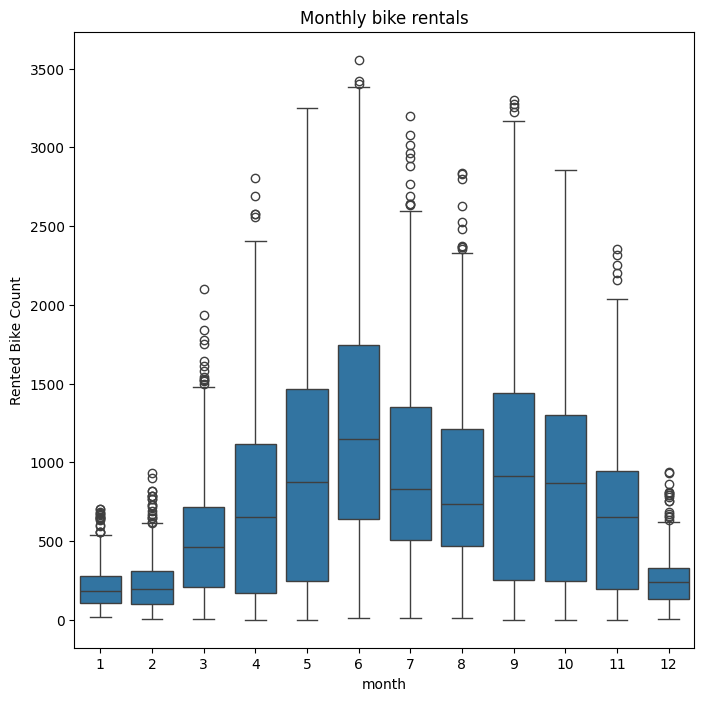

In [44]:
# visualizing the data

plt.figure(figsize=(8,8))
sns.boxplot(data=df, x='month',y='Rented Bike Count')
plt.title('Monthly bike rentals')
plt.show()


# correlation of data
# plt.figure(figsize=(10,10))
# sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
# plt.title('Correlation of data')
# plt.show()

In [48]:
X = df[['Temperature(캜)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
        'Dew point temperature(캜)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
        'month', 'DayOfWeek']]

if 'Hour' in df.columns:
  X['Hour']= df['Hour']

Y= df['Rented Bike Count']

<ipython-input-48-2063c46e4240>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Hour']= df['Hour']


In [49]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)


Random Forest - RMSE: 255.67, MAE: 138.23
Gradient Boosting - RMSE: 309.84, MAE: 190.52


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


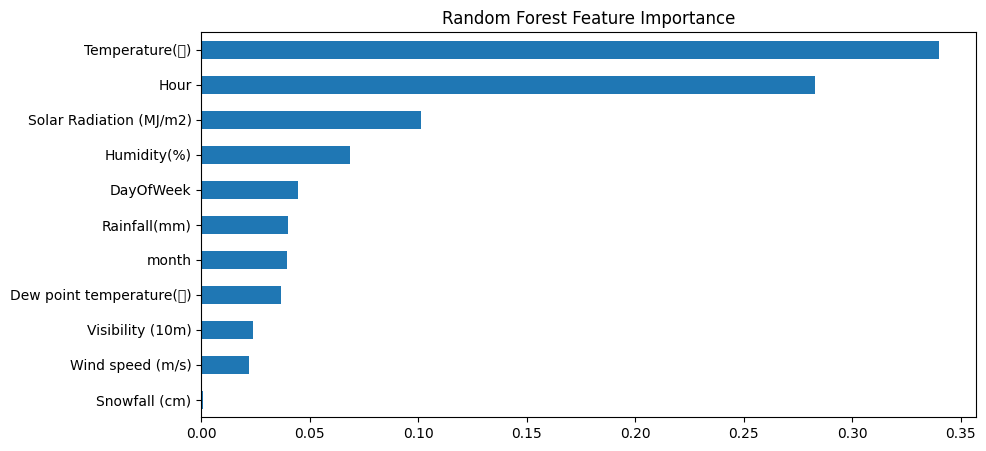

In [51]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train,Y_train)
rf_pred= rf.predict(X_test)


rb = GradientBoostingRegressor(n_estimators=100,random_state=42)
rb.fit(X_train,Y_train)
rb_pred= rb.predict(X_test)


def evaluate(y_true,y_pred,model_name):
  rmse= np.sqrt(mean_squared_error(y_true,y_pred))
  mae = np.mean(np.abs(y_true-y_pred))
  print(f'{model_name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}')

evaluate(Y_test,rf_pred,'Random Forest')
evaluate(Y_test,rb_pred,'Gradient Boosting')


# Feature importance plot
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 5))
feat_importances.sort_values().plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.show()
